[Open in Colab](https://colab.research.google.com/github/barzansaeedpour/energy-consumption-predicting/blob/main/Bidirectional_LSTM_Attention_mechanism_Predict_Energy_Consumption.ipynb)

<div dir="rtl" style="font-family: Arial; font-size: 14px; line-height: 1.5;">

<h1>
 مدل پیشرفته LSTM دوطرفه (Bidirectional) با استفاده از مکانیزم توجه (Attension mechanism) و داده های سری زمانی (Time series) برای پیش بینی دقیق مصرف انرژی
</h1>
</div>


<div dir="rtl" style="font-family: Arial; font-size: 14px; padding: 15px; background-color: #f8f9fa; border-radius: 8px; border: 1px solid #ddd;">

<h3 style="color: #2c3e50; border-bottom: 2px solid #3498db; padding-bottom: 8px;">نقاط قوت و نوآوری‌های مدل</h3>

<div style="background-color: white; padding: 12px; margin: 10px 0; border-radius: 6px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
<h4 style="color: #16a085;">🔹 معماری پیشرفته ترکیبی</h4>
<p>ترکیب هوشمندانه سه تکنیک مدرن:</p>
<ul>
  <li><b>LSTM دوطرفه:</b> تحلیل همزمان گذشته و آینده در هر گام زمانی</li>
  <li><b>مکانیزم توجه:</b> تمرکز پویا روی بخش‌های کلیدی داده</li>
  <li><b>اتصالات باقیمانده:</b> حل مشکل vanishing gradient در شبکه‌های عمیق</li>
</ul>
</div>

<div style="background-color: white; padding: 12px; margin: 10px 0; border-radius: 6px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
<h4 style="color: #e74c3c;">🔹 لایه توجه سفارشی</h4>
<p>نوآوری‌های کلیدی در پیاده‌سازی Attention:</p>
<ul>
  <li>محاسبه وزن‌های توجه با تابع tanh برای محدوده‌ای منعطف‌تر</li>
  <li>استفاده از softmax برای نرمالیزه کردن اهمیت گام‌های زمانی</li>
  <li>یادگیری خودکار پارامترهای W, b, u طی فرآیند آموزش</li>
</ul>
</div>

<div style="background-color: white; padding: 12px; margin: 10px 0; border-radius: 6px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
<h4 style="color: #9b59b6;">🔹 مکانیزم‌های جلوگیری از بیش‌برازش</h4>
<ul>
  <li>Dropout با نرخ 30% در هر لایه LSTM</li>
  <li>Batch Normalization برای پایدارسازی یادگیری</li>
  <li>Early Stopping با patience=10 برای توقف به موقع آموزش</li>
</ul>
</div>

<div style="background-color: white; padding: 12px; margin: 10px 0; border-radius: 6px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
<h4 style="color: #f39c12;">🔹 قابلیت‌های پیشرفته یادگیری</h4>
<ul>
  <li>پشتیبانی از وابستگی‌های بلندمدت و کوتاه‌مدت</li>
  <li>حفظ اطلاعات مفید از طریق اتصالات باقیمانده</li>
  <li>بهینه‌سازی Adam با نرخ یادگیری 0.001 برای همگرایی بهتر</li>
</ul>
</div>

</div>

<div dir="rtl" style="font-family: Arial; font-size: 14px; line-height: 1.5;">
  <p><b>تایم‌سریس (Time Series):</b> داده‌های ثبت‌شده در بازه‌های زمانی منظم (مثلاً ساعت‌به‌ساعت یا روزانه) که برای تحلیل روندها، الگوهای فصلی و پیش‌بینی استفاده می‌شوند. مثال‌ها شامل قیمت سهام، مصرف انرژی یا آمار فروش هستند. ابزارهایی مانند پانداس در پایتون امکان پردازش، نمونه‌برداری مجدد و پیش‌بینی این داده‌ها را فراهم می‌کنند.</p>
</div>

# Data

In [1]:
# Imports
import pandas as pd
# import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<p dir='rtl'>
کد زیر داده‌ها را از یک منبع آنلاین بارگذاری می‌کند. ابتدا آدرس (<code>URL</code>) فایل <code>events.csv</code> که در یک مخزن GitHub آپلود شده است، تعریف می‌شود. سپس با استفاده از تابع <code>pd.read_csv()</code> از کتابخانه <code>pandas</code>، داده‌های این فایل CSV خوانده شده و در یک دیتافریم به نام <code>df</code> ذخیره می‌شوند. این دیتافریم برای پردازش و تحلیل‌های بعدی آماده می‌شود.
</p>


In [2]:
# Importing Data
URL = 'https://raw.githubusercontent.com/barzansaeedpour/energy-consumption-predicting/refs/heads/main/dataset/events.csv'
df = pd.read_csv(URL)

## Data Exploration

In [3]:
print("Return first 5 rows.","\n")
df.head()

Return first 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
0,2015-12-31 21:00:00,2015-12-31 22:00:00,2016-01-01 00:00:00,2016-01-01 01:00:00,10800.0
1,2015-12-31 22:00:00,2015-12-31 23:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,10431.0
2,2015-12-31 23:00:00,2016-01-01 00:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,10005.0
3,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,9722.0
4,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,9599.0


In [ ]:
print("Return last 5 rows.","\n")
df.tail()

Return last 5 rows. 



,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,2021-12-31 19:00:00,2021-12-31 20:00:00,11447.0
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,11237.0
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,10914.0
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00,10599.0
52965,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 23:00:00,2022-01-01 00:00:00,10812.0


<div dir="rtl" style="font-family: Arial; font-size: 14px; line-height: 1.5;">
  <h3>توضیح خروجی کد زیر:</h3>
  <p>این اطلاعات مربوط به یک دیتافریم پانداس است با مشخصات زیر:</p>
  
  <ul>
    <li><b>تعداد سطرها:</b> 52,966 سطر (از 0 تا 52,965)</li>
    <li><b>ستون‌ها (5 ستون):</b>
      <ul>
        <li>Start time UTC (متنی/تاریخ)</li>
        <li>End time UTC (متنی/تاریخ)</li>
        <li>Start time UTC+03:00 (متنی/تاریخ)</li>
        <li>End time UTC+03:00 (متنی/تاریخ)</li>
        <li>Electricity consumption in Finland (عددی اعشاری)</li>
      </ul>
    </li>
    <li><b>مقدارهای خالی:</b> هیچ مقدار خالی وجود ندارد</li>
    <li><b>حافظه مصرفی:</b> حدود 2 مگابایت</li>
  </ul>
</div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [ ]:
print(df.describe(), "\n")

       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000 



## Feature Extraction


<p dir='rtl'>
کد زیر عملیات پاکسازی و تغییر نام ستون‌ها را در یک دیتافریم (<code>df</code>) انجام می‌دهد. ابتدا سه ستون <strong>"Start time UTC"</strong>، <strong>"End time UTC"</strong> و <strong>"Start time UTC+03:00"</strong> حذف می‌شوند. سپس نام ستون <strong>"End time UTC+03:00"</strong> به <strong>"DateTime"</strong> و نام ستون <strong>"Electricity consumption in Finland"</strong> به <strong>"Consumption"</strong> تغییر می‌یابد. در نهایت، ۵ ردیف اول دیتافریم ویرایش‌شده چاپ می‌شود.
</p>


In [ ]:
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     52966 non-null  object 
 1   Consumption  52966 non-null  float64
dtypes: float64(1), object(1)
memory usage: 827.7+ KB


<div dir="rtl" style="font-family: Arial; font-size: 14px; line-height: 1.5;">
  <h3>توضیح کد زیر:</h3>
  <p><code>pd.to_datetime(df["DateTime"])</code></p>
  
  <p>این کد ستون "DateTime" را به فرمت تاریخ-زمان تبدیل می‌کند:</p>
  
  <ul>
    <li><b>ورودی:</b> ستون "DateTime" از دیتافریم</li>
    <li><b>عملکرد:</b> تبدیل رشته‌های تاریخ/زمان به فرمت datetime پانداس</li>
    <li><b>کاربرد:</b> تحلیل‌های زمانی، استخراج اجزای تاریخ، محاسبات زمانی</li>
    <li><b>مقادیر نامعتبر:</b> به <code>NaT</code> تبدیل می‌شوند</li>
  </ul>
  
  <p><b>مثال:</b> اگر ستون شامل "2023-01-15 14:30:00" باشد، به فرمت datetime تبدیل می‌شود.</p>
</div>

In [ ]:
pd.to_datetime(df["DateTime"])

,DateTime
0,2016-01-01 01:00:00
1,2016-01-01 02:00:00
2,2016-01-01 03:00:00
3,2016-01-01 04:00:00
4,2016-01-01 05:00:00
...,...
52961,2021-12-31 20:00:00
52962,2021-12-31 21:00:00
52963,2021-12-31 22:00:00
52964,2021-12-31 23:00:00


In [ ]:
df

,DateTime,Consumption
0,2016-01-01 01:00:00,10800.0
1,2016-01-01 02:00:00,10431.0
2,2016-01-01 03:00:00,10005.0
3,2016-01-01 04:00:00,9722.0
4,2016-01-01 05:00:00,9599.0
...,...,...
52961,2021-12-31 20:00:00,11447.0
52962,2021-12-31 21:00:00,11237.0
52963,2021-12-31 22:00:00,10914.0
52964,2021-12-31 23:00:00,10599.0


<div dir="rtl" style="font-family: Arial; padding: 10px; background-color: #f5f5f5; border-radius: 5px;">
<h3>توضیح کد زیر</h3>

<p>این کد اطلاعات هفته‌ای تاریخ‌ها را استخراج می‌کند:</p>

<div style="background: white; padding: 10px; margin: 5px; border-right: 3px solid #3498db;">
<ol>
  <li><b>تبدیل به datetime:</b> <code>pd.to_datetime(df["DateTime"])</code></li>
  <li><b>استخراج هفته ISO:</b> <code>.dt.isocalendar()</code></li>
</ol>
</div>

<div style="background: #e8f4f8; padding: 10px; margin: 5px;">
<p><b>خروجی شامل:</b></p>
<ul>
  <li>سال ISO</li>
  <li>شماره هفته (1-52/53)</li>
  <li>روز هفته (1=دوشنبه، 7=یکشنبه)</li>
</ul>
</div>

<p style="font-size: 0.9em; color: #555;">برای تحلیل‌های زمانی مبتنی بر هفته بسیار کاربردی است.</p>
</div>

In [ ]:
pd.to_datetime(df["DateTime"]).dt.isocalendar()

,year,week,day
0,2015,53,5
1,2015,53,5
2,2015,53,5
3,2015,53,5
4,2015,53,5
...,...,...,...
52961,2021,52,5
52962,2021,52,5
52963,2021,52,5
52964,2021,52,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     52966 non-null  object 
 1   Consumption  52966 non-null  float64
dtypes: float64(1), object(1)
memory usage: 827.7+ KB


In [ ]:
_dt = pd.to_datetime(df["DateTime"])

In [ ]:
_dt.info()

<class 'pandas.core.series.Series'>
RangeIndex: 52966 entries, 0 to 52965
Series name: DateTime
Non-Null Count  Dtype         
--------------  -----         
52966 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 413.9 KB


In [ ]:
_dt.dt.time

,DateTime
0,01:00:00
1,02:00:00
2,03:00:00
3,04:00:00
4,05:00:00
...,...
52961,20:00:00
52962,21:00:00
52963,22:00:00
52964,23:00:00


<div dir="rtl">
<p><b>توضیح کد:</b></p>
<ul>
  <li>ابتدا دیتافریم <code>df</code> را در متغیر <code>dataset</code> کپی می‌کنیم.</li>
  <li>ستون <code>DateTime</code> را به فرمت تاریخ تبدیل کرده و ستون‌های زیر را استخراج می‌کنیم:
    <ul>
      <li><code>Month</code>: ماه</li>
      <li><code>Year</code>: سال</li>
      <li><code>Date</code>: فقط تاریخ</li>
      <li><code>Time</code>: فقط زمان</li>
      <li><code>Week</code>: شماره هفته</li>
      <li><code>Day</code>: نام روز هفته</li>
    </ul>
  </li>
  <li>سپس ستون <code>DateTime</code> را به عنوان نمایه (Index) دیتافریم تنظیم کرده و آن را به فرمت datetime تبدیل می‌کنیم.</li>
</ul>
</div>


In [ ]:
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52966 entries, 2016-01-01 01:00:00 to 2022-01-01 00:00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  52966 non-null  float64
 1   Month        52966 non-null  int32  
 2   Year         52966 non-null  int32  
 3   Date         52966 non-null  object 
 4   Time         52966 non-null  object 
 5   Week         52966 non-null  UInt32 
 6   Day          52966 non-null  object 
dtypes: UInt32(1), float64(1), int32(2), object(3)
memory usage: 2.7+ MB


In [ ]:
dataset

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday
...,...,...,...,...,...,...,...
2021-12-31 20:00:00,11447.0,12,2021,2021-12-31,20:00:00,52,Friday
2021-12-31 21:00:00,11237.0,12,2021,2021-12-31,21:00:00,52,Friday
2021-12-31 22:00:00,10914.0,12,2021,2021-12-31,22:00:00,52,Friday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     52966 non-null  object 
 1   Consumption  52966 non-null  float64
 2   Month        52966 non-null  int32  
 3   Year         52966 non-null  int32  
 4   Date         52966 non-null  object 
 5   Time         52966 non-null  object 
 6   Week         52966 non-null  UInt32 
 7   Day          52966 non-null  object 
dtypes: UInt32(1), float64(1), int32(2), object(4)
memory usage: 2.7+ MB


In [ ]:
dataset.head()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday


In [ ]:
print("")
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())


Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


In [ ]:
# By assuming week starts on Mondey and ends on Sunday.
# The closest start would be on Monday 4-1-2016
# The closest end would be on sunday 26-12-2021
# So we should omit first 71 rows and last 121 rows.
dataset = dataset[71:-121]
dataset.tail()

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday
2021-12-26 22:00:00,12384.0,12,2021,2021-12-26,22:00:00,51,Sunday
2021-12-26 23:00:00,12044.0,12,2021,2021-12-26,23:00:00,51,Sunday


In [ ]:
dataset

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:00:00,11721.0,1,2016,2016-01-04,00:00:00,1,Monday
2016-01-04 01:00:00,11626.0,1,2016,2016-01-04,01:00:00,1,Monday
2016-01-04 02:00:00,11253.0,1,2016,2016-01-04,02:00:00,1,Monday
2016-01-04 03:00:00,10925.0,1,2016,2016-01-04,03:00:00,1,Monday
2016-01-04 04:00:00,10684.0,1,2016,2016-01-04,04:00:00,1,Monday
...,...,...,...,...,...,...,...
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday


In [ ]:
df

,DateTime,Consumption,Month,Year,Date,Time,Week,Day
0,2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
1,2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2,2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
3,2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
4,2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday
...,...,...,...,...,...,...,...,...
52961,2021-12-31 20:00:00,11447.0,12,2021,2021-12-31,20:00:00,52,Friday
52962,2021-12-31 21:00:00,11237.0,12,2021,2021-12-31,21:00:00,52,Friday
52963,2021-12-31 22:00:00,10914.0,12,2021,2021-12-31,22:00:00,52,Friday
52964,2021-12-31 23:00:00,10599.0,12,2021,2021-12-31,23:00:00,52,Friday


## Data Visualizations

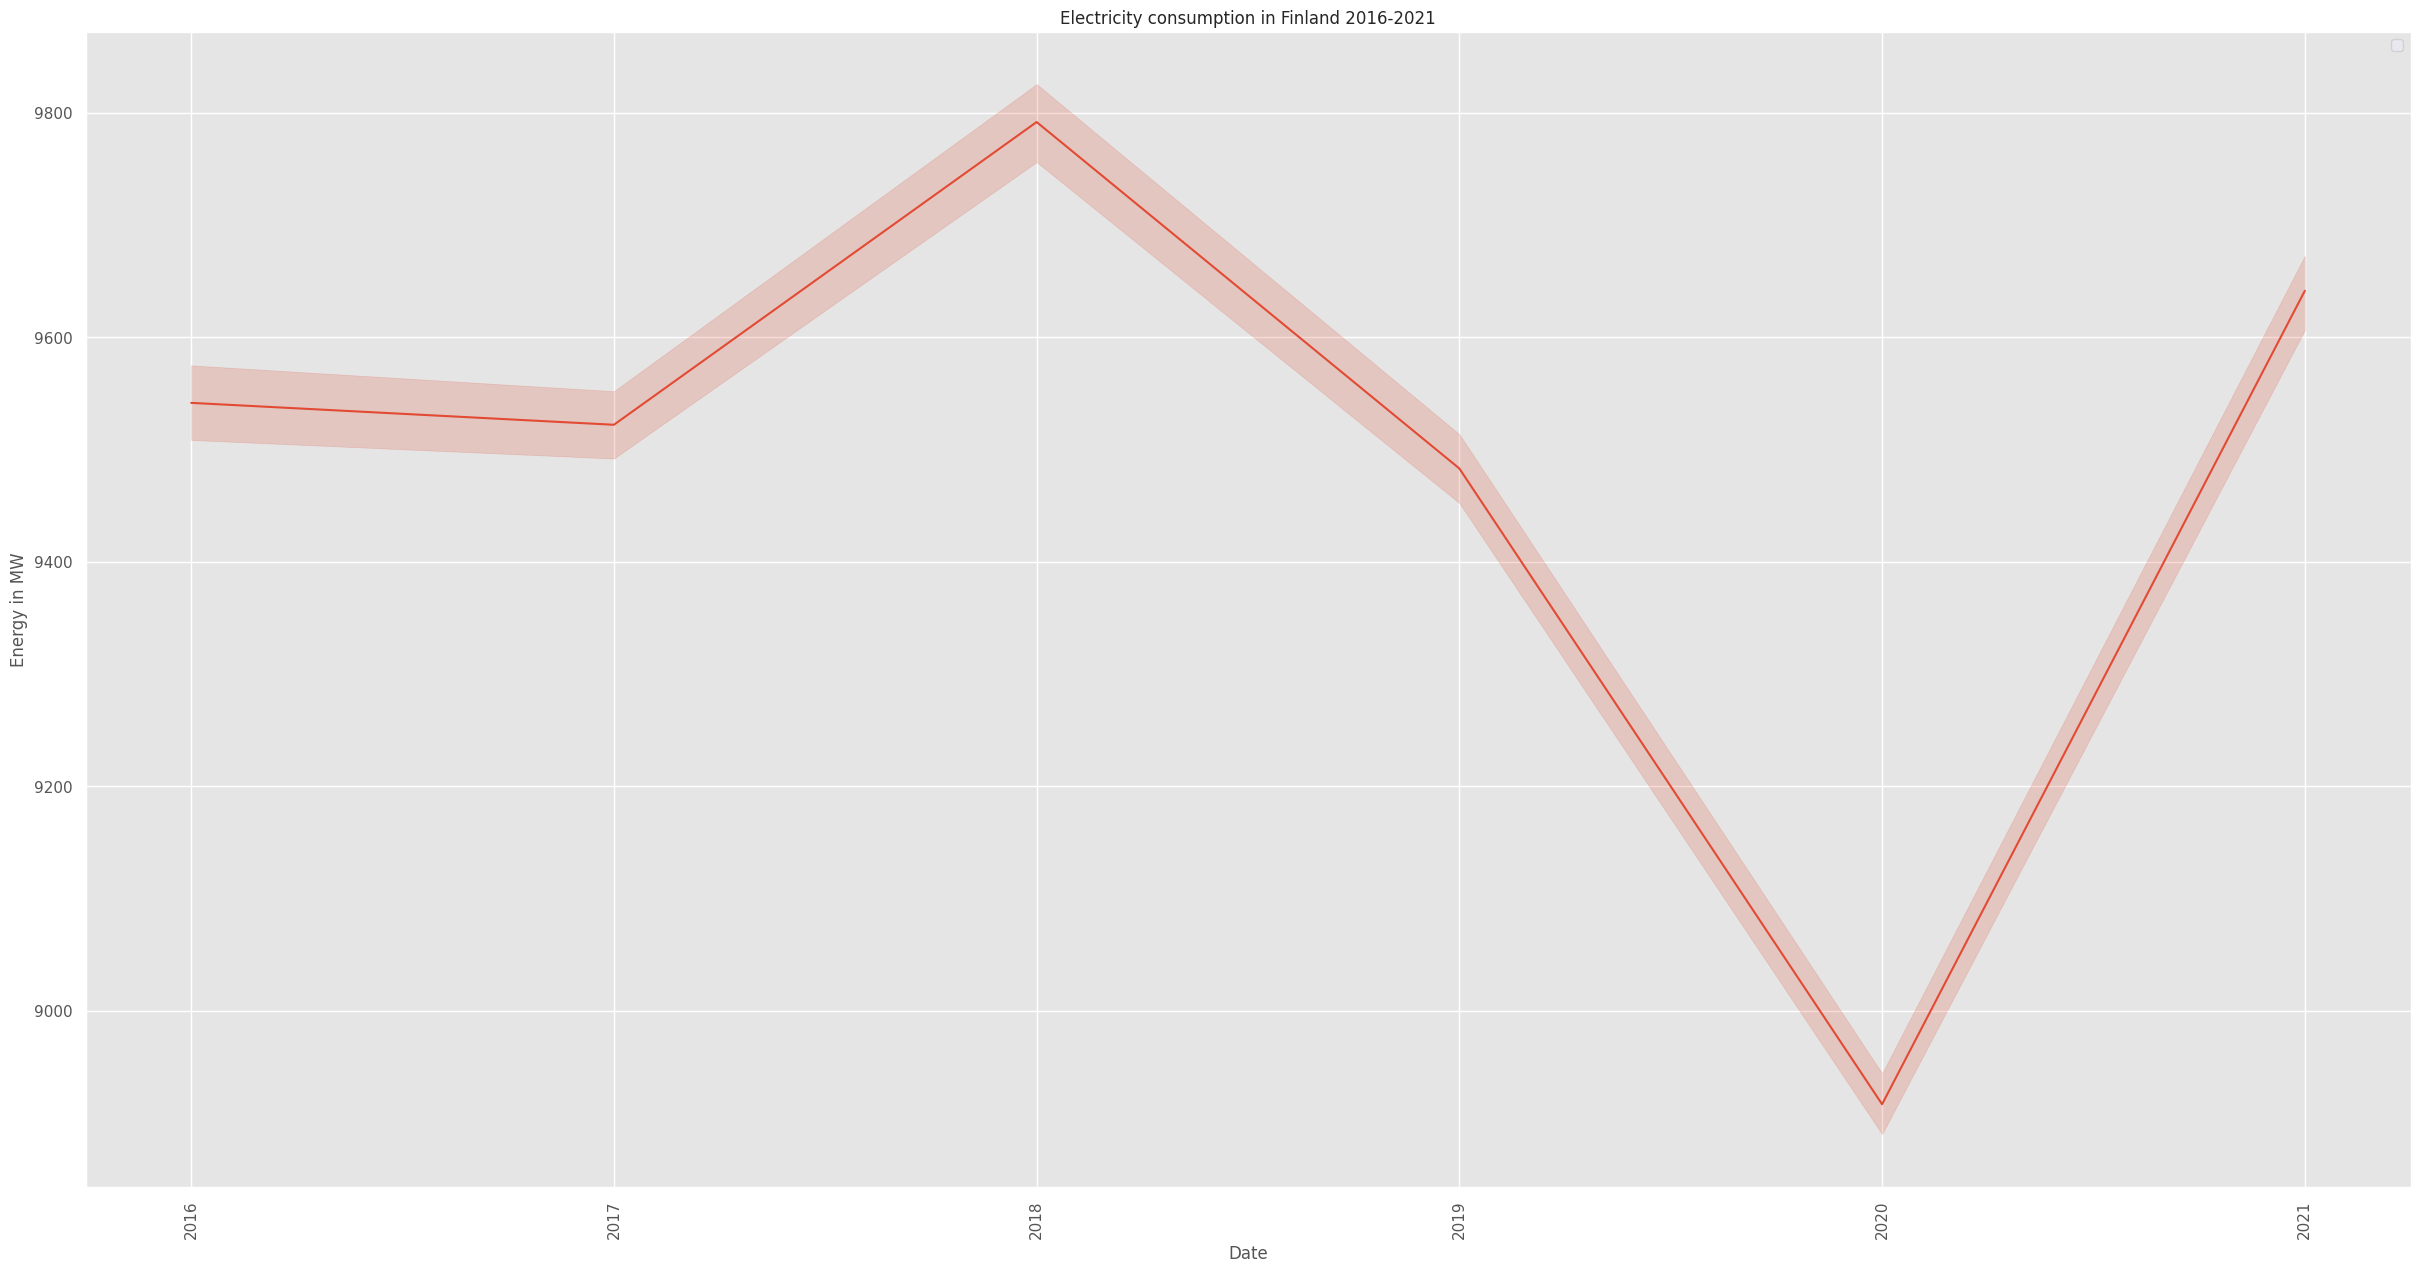

In [ ]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Year"], y= dataset["Consumption"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption in Finland 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)


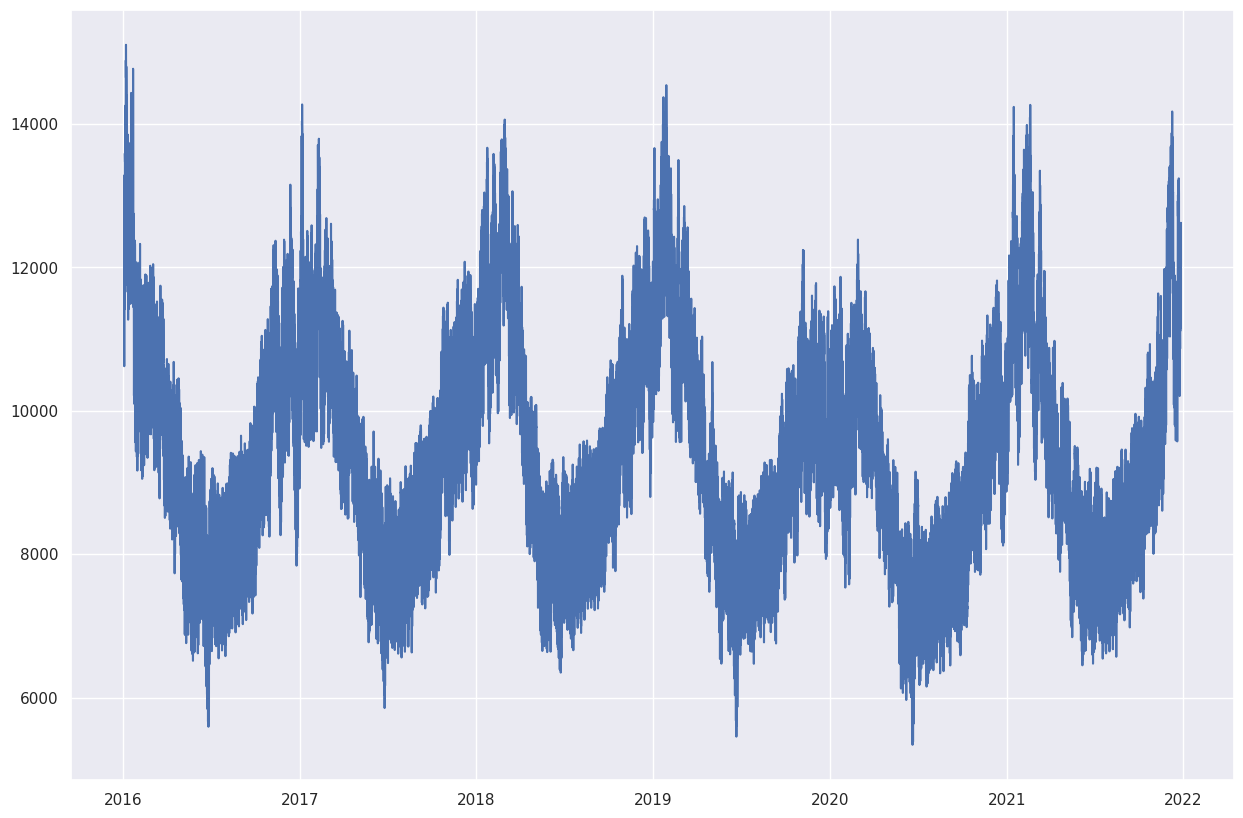

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dataset["Consumption"])

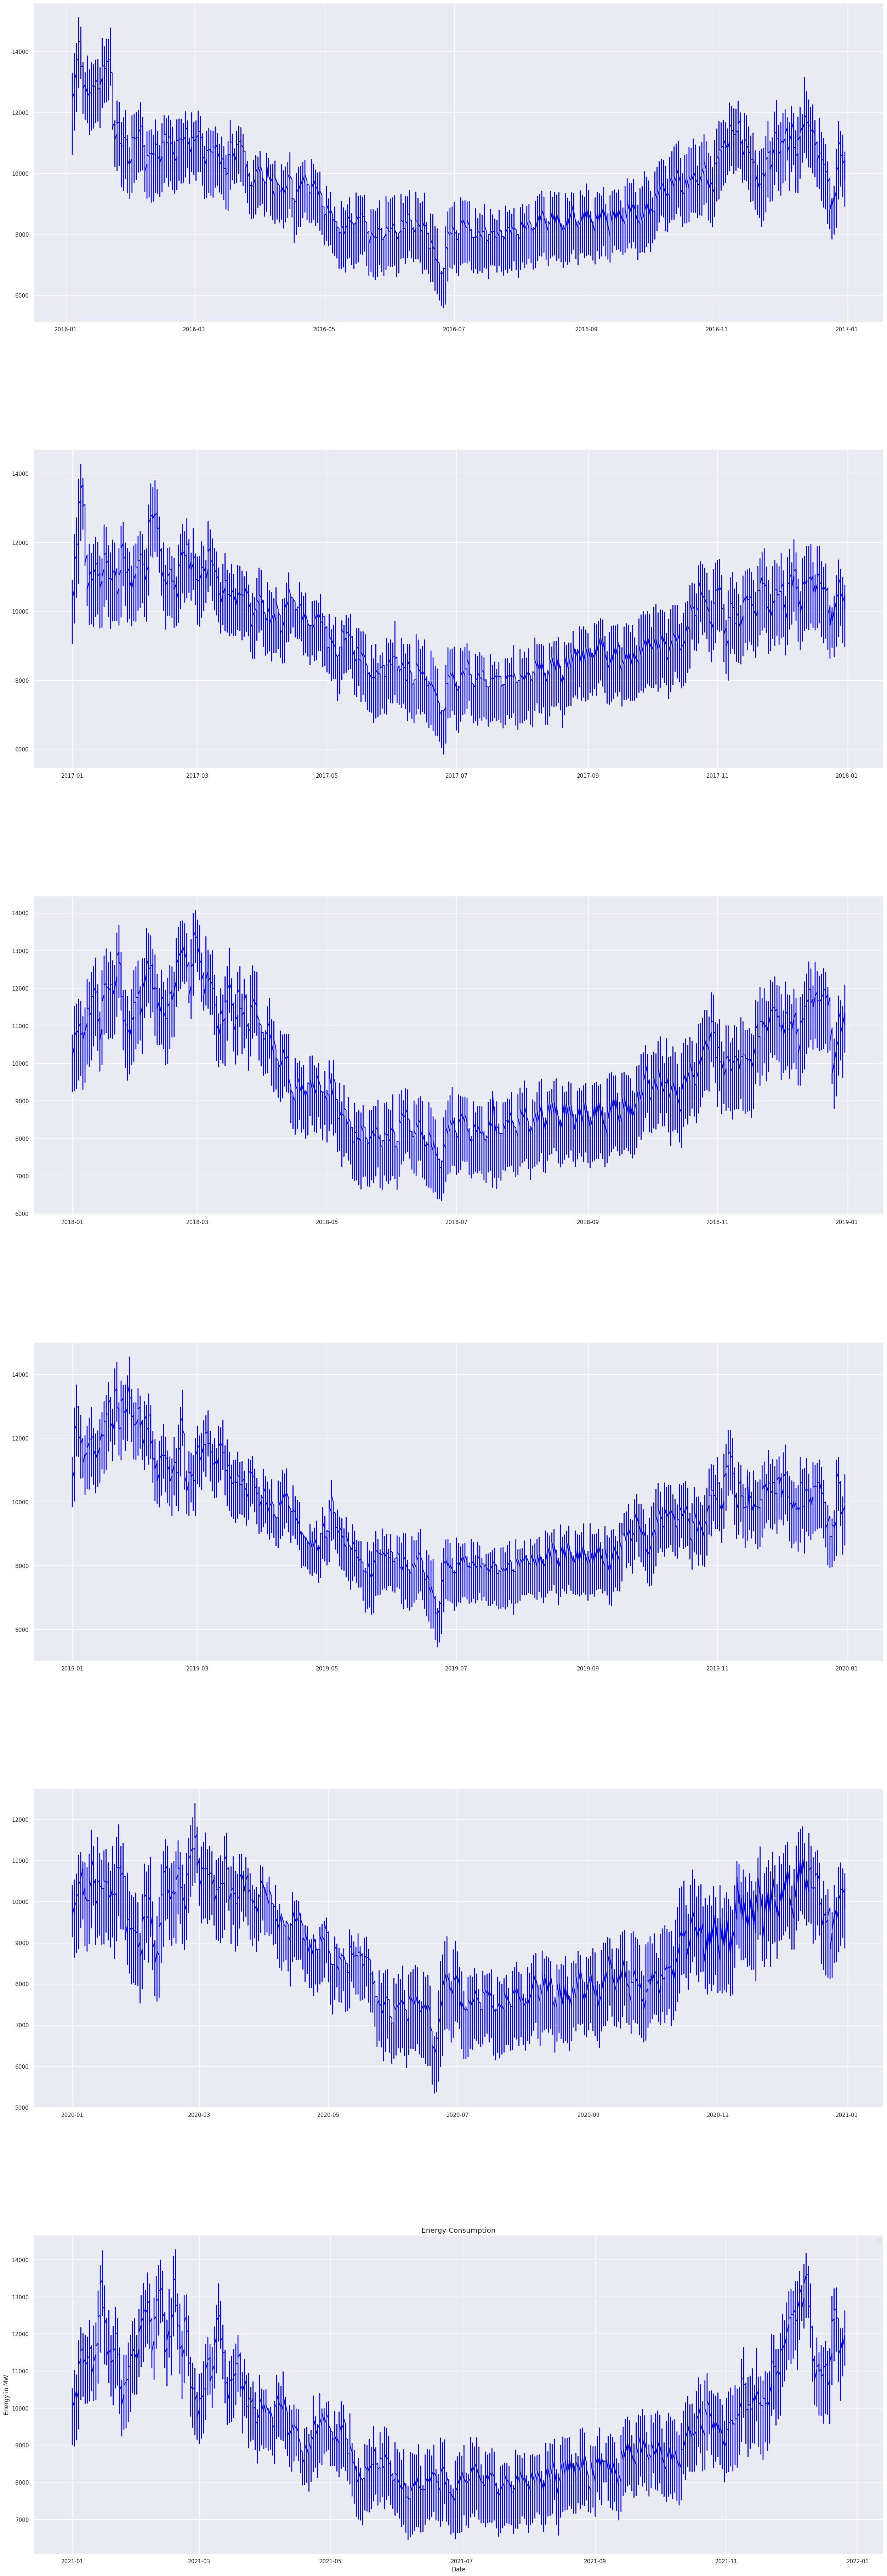

In [ ]:
# Energy Consumption Each Year
from matplotlib import style

fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)

style.use("ggplot")

y_2016 = dataset.loc["2016"]["Consumption"].to_list()
x_2016 = dataset.loc["2016"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

y_2017 = dataset.loc["2017"]["Consumption"].to_list()
x_2017 = dataset.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

y_2018 = dataset.loc["2018"]["Consumption"].to_list()
x_2018 = dataset.loc["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

y_2019 = dataset.loc["2019"]["Consumption"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = dataset.loc["2020"]["Consumption"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = dataset.loc["2021"]["Consumption"].to_list()
x_2021 = dataset.loc["2021"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

<ipython-input-164-0801f72f3c60>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Energy Distribution')

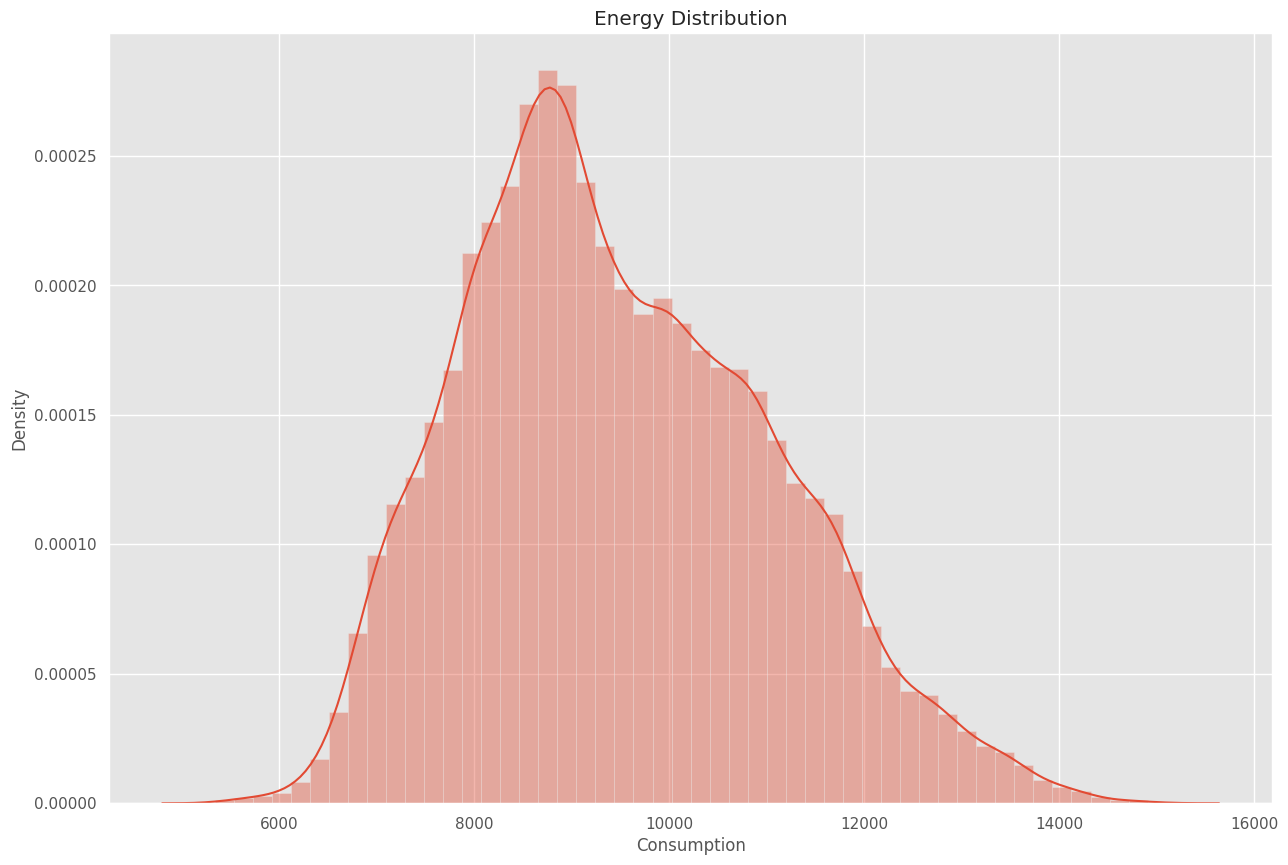

In [ ]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

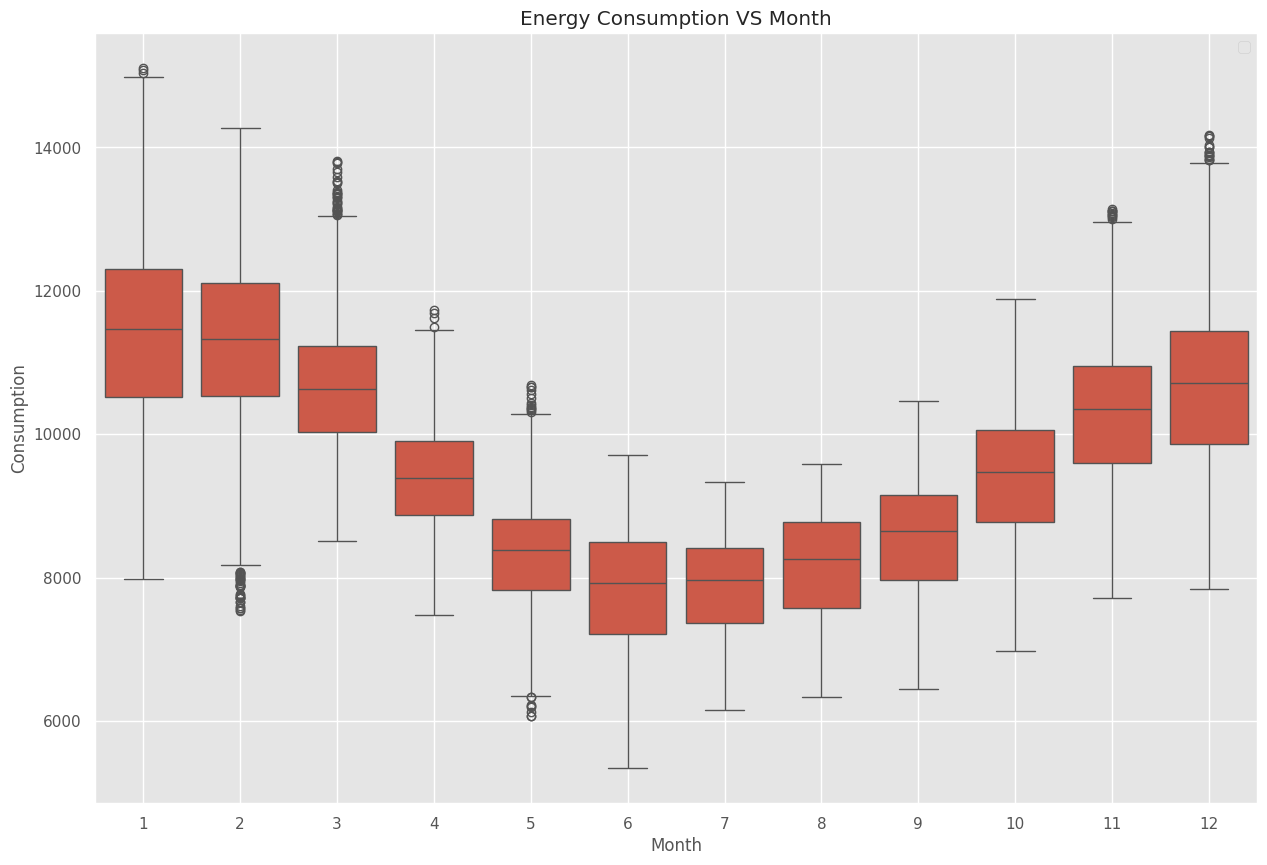

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset["Month"], y=dataset["Consumption"], data= df)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [ ]:
# dataset1.index.hour

In [ ]:
# dataset1.Consumption

In [ ]:
df

,DateTime,Consumption,Month,Year,Date,Time,Week,Day
0,2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,53,Friday
1,2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,53,Friday
2,2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,53,Friday
3,2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,53,Friday
4,2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,53,Friday
...,...,...,...,...,...,...,...,...
52961,2021-12-31 20:00:00,11447.0,12,2021,2021-12-31,20:00:00,52,Friday
52962,2021-12-31 21:00:00,11237.0,12,2021,2021-12-31,21:00:00,52,Friday
52963,2021-12-31 22:00:00,10914.0,12,2021,2021-12-31,22:00:00,52,Friday
52964,2021-12-31 23:00:00,10599.0,12,2021,2021-12-31,23:00:00,52,Friday


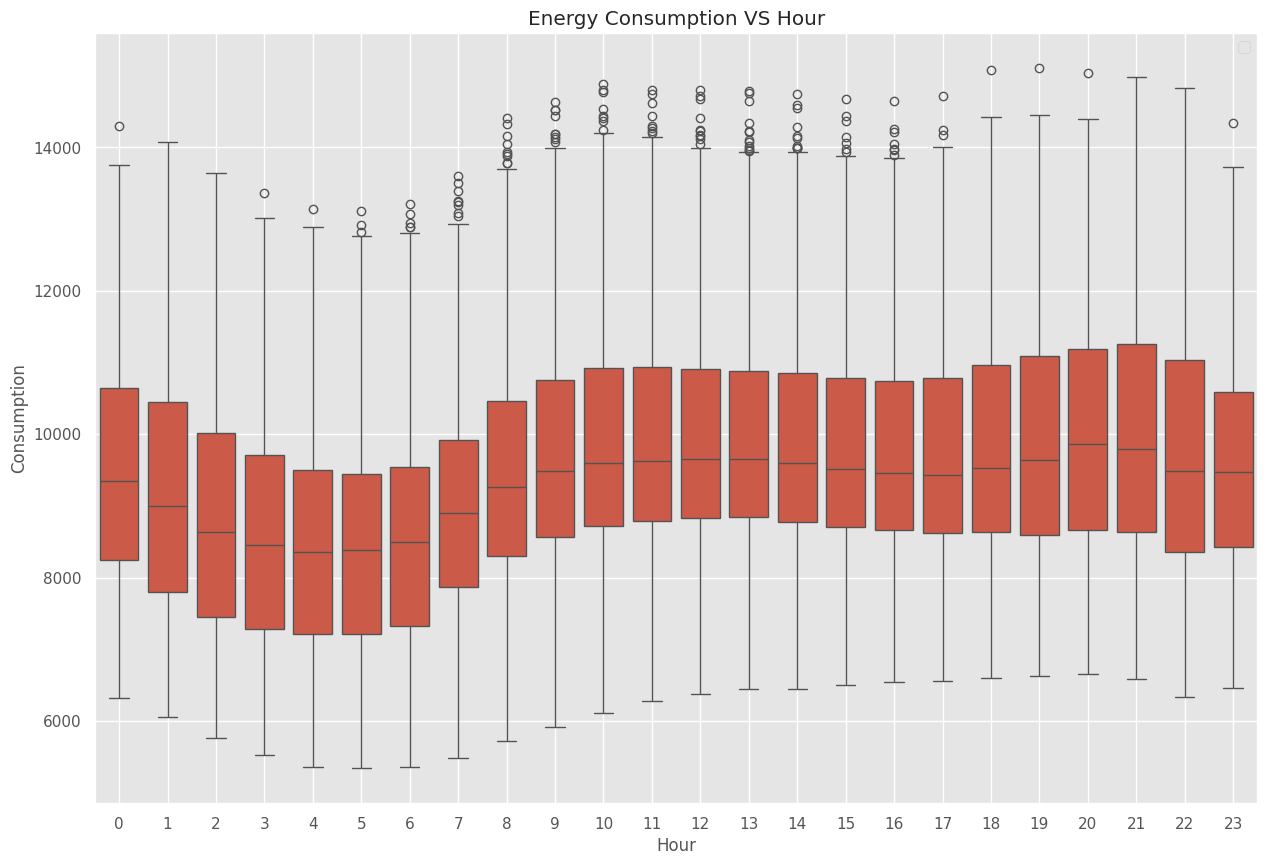

In [ ]:
dataset1 = dataset
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset1.index.hour, y=dataset1.Consumption, data= dataset)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

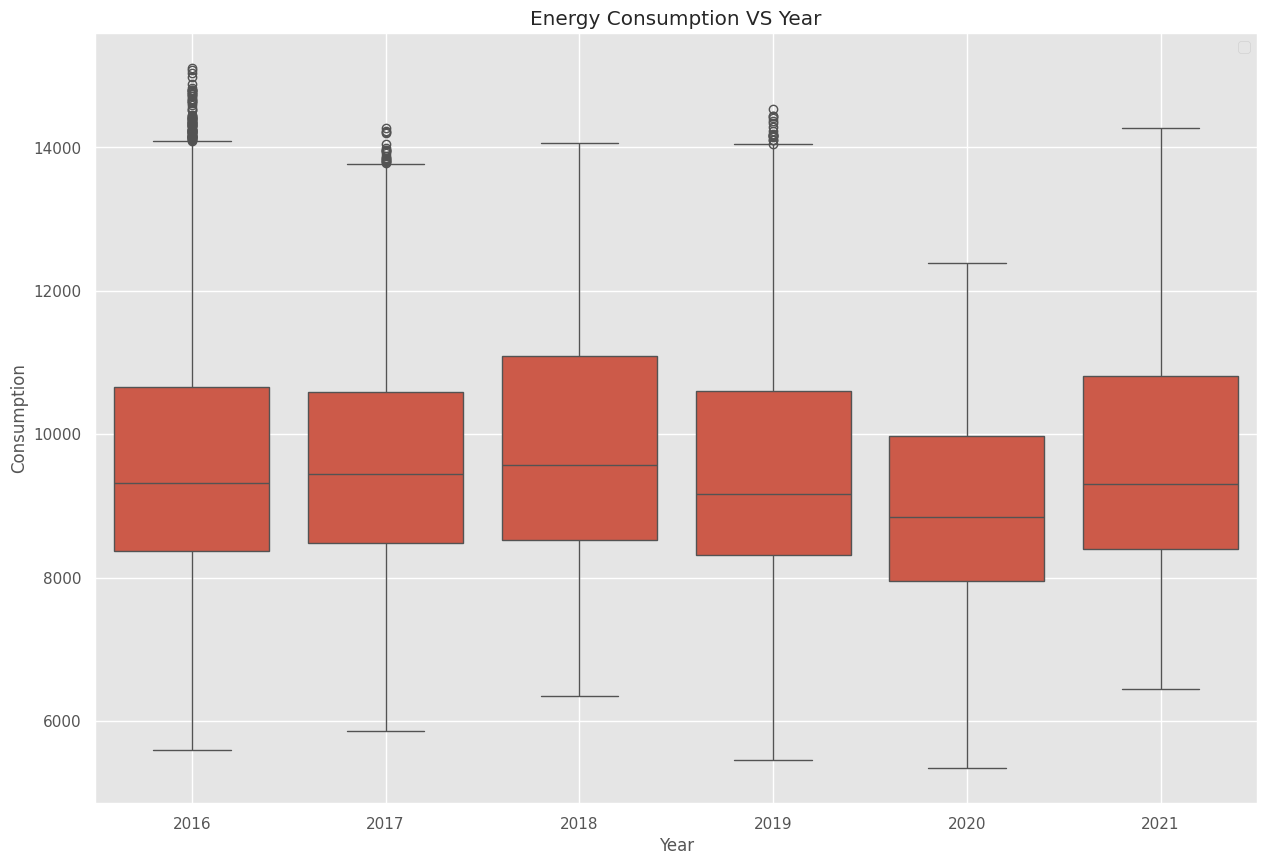

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset1.index.year, y=dataset1.Consumption, data= dataset)
plt.title("Energy Consumption VS Year")
plt.xlabel("Year")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# LSTM Model

## Train, Validation and Test Dataset

In [ ]:
dataset2 = dataset[['Consumption','Month','Year', 'Week']]

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52774 entries, 2016-01-04 00:00:00 to 2021-12-26 23:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  52774 non-null  float64
 1   Month        52774 non-null  int32  
 2   Year         52774 non-null  int32  
 3   Week         52774 non-null  UInt32 
dtypes: UInt32(1), float64(1), int32(2)
memory usage: 1.5 MB


In [ ]:
# Downsampling involves decreasing the time-frequency of the data
# Downsapling the time-frequency from hours to days
newDataSet = dataset2.resample("D").mean()
# newDataSet = dataset

In [ ]:
# We have 2193 row
# 2193 - 3 - 6 = 2184 row after omit first two rows and last six ones.
# 2184 / 7 = 312 week
# 312 * 80 %  250 week for train (1750 day)
# 312 - 250 = 62 week for test (434 day)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


In [ ]:
# Saving data in CSV new file
# newDataSet.to_csv("newDataSet.csv")
# from google.colab import files
# files.download("newDataSet.csv")

In [ ]:
newDataSet.head()

,Consumption,Month,Year,Week
DateTime,,,,
2016-01-04,12300.625000,1.0,2016.0,1.0
2016-01-05,12945.375000,1.0,2016.0,1.0
2016-01-06,13192.750000,1.0,2016.0,1.0
2016-01-07,14243.541667,1.0,2016.0,1.0
2016-01-08,14121.666667,1.0,2016.0,1.0


In [ ]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

12300.625


<ipython-input-177-8e8eaf141bc3>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[0])


(2184,)

In [ ]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1))
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])


Normalizing data before model fitting
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [ ]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]


In [ ]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)


In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)


In [ ]:
# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)


X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)


## Model Structure 1


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout
# time_step = 100
# model = Sequential()

# # Adding the first LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
# model.add(Dropout(0.2))

# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# # model.add(Dropout(0.2))

# # # Adding a third LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# # model.add(Dropout(0.2))

# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# # model.add(Dropout(0.2))

# # Adding the output layer
# model.add(Dense(units = 1))

# # Compiling the RNN
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Model Structure 2

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Bidirectional
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping, ModelCheckpoint

# time_step = 100
# model = Sequential()

# # Adding the first LSTM layer with Bidirectional and Dropout
# model.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1))))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())

# # Adding a second LSTM layer and Dropout
# model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())

# # Adding a third LSTM layer without return sequences
# model.add(Bidirectional(LSTM(units=100)))
# model.add(Dropout(0.3))

# # Adding the output layer
# model.add(Dense(units=1))

# # Compiling the RNN with a learning rate decay
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='mean_squared_error')

# # Early stopping and model checkpointing with the new .keras extension
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# # Summary of the model
# model.summary()


## Model Structure 3

<div dir="rtl" style="text-align: right;">
  این مدل یادگیری عمیق با استفاده از معماری LSTM دوطرفه برای پیش‌بینی سری‌های زمانی طراحی شده است. ورودی مدل دنباله‌ای با ۱۰۰ گام زمانی دارد. ابتدا دو لایه LSTM دوطرفه به همراه Dropout و BatchNormalization برای استخراج ویژگی‌ها استفاده شده‌اند که در لایه دوم از اتصال باقی‌مانده (Residual Connection) جهت بهبود عملکرد یادگیری استفاده شده است. سپس یک لایه LSTM دیگر اضافه شده و خروجی آن به یک لایه توجه (Attention) داده شده تا مدل بتواند روی بخش‌های مهم‌تر دنباله تمرکز کند. در انتها، یک لایه چگال (Dense) مقدار نهایی را پیش‌بینی می‌کند. مدل با استفاده از بهینه‌ساز Adam و تابع خطای میانگین مربعات (MSE) کامپایل شده و از EarlyStopping و ذخیره بهترین مدل جهت بهبود آموزش استفاده می‌شود.
</div>


In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Add, Layer
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf

# Custom attention layer
class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight", shape=(input_shape[-1], input_shape[-1]),
                                 initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="attention_bias", shape=(input_shape[-1],), initializer="zeros", trainable=True)
        self.u = self.add_weight(name="context_vector", shape=(input_shape[-1], 1),
                                 initializer="glorot_uniform", trainable=True)

    def call(self, x):
        score = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=1), axis=1)
        context_vector = attention_weights * x
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

# Model architecture
time_step = 100
input_seq = Input(shape=(time_step, 1))

# First Bidirectional LSTM Layer
x = Bidirectional(LSTM(100, return_sequences=True))(input_seq)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Second Bidirectional LSTM Layer with Residual Connection
x_res = Bidirectional(LSTM(100, return_sequences=True))(x)
x_res = Dropout(0.3)(x_res)
x_res = BatchNormalization()(x_res)
x = Add()([x, x_res])  # Adding residual connection

# Third LSTM Layer
x = Bidirectional(LSTM(100, return_sequences=True))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Attention Layer
x = AttentionLayer()(x)

# Output layer
output = Dense(1)(x)

# Define the model
model = Model(inputs=input_seq, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('advanced_model.keras', monitor='val_loss', save_best_only=True)

# Summary of the model
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_9           │ (None, 100, 200)       │         81,600 │ input_layer_2[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 100, 200)       │              0 │ bidirectional_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 100, 200)       │            800 │ dropout_9[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_10          │ (None, 100, 200)       │        240,800 │ batch_normalization_7… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 100, 200)       │              0 │ bidirectional_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 100, 200)       │            800 │ dropout_10[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 100, 200)       │              0 │ batch_normalization_7… │
│                           │                        │                │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_11          │ (None, 100, 200)       │        240,800 │ add_1[0][0]            │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 100, 200)       │              0 │ bidirectional_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 100, 200)       │            800 │ dropout_11[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer_1         │ (None, 200)            │         40,400 │ batch_normalization_9… │
│ (AttentionLayer)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │            201 │ attention_layer_1[0][… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 606,201 (2.31 MB)

 Trainable params: 605,001 (2.31 MB)

 Non-trainable params: 1,200 (4.69 KB)

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_9           │ (None, 100, 200)       │         81,600 │ input_layer_2[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 100, 200)       │              0 │ bidirectional_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 100, 200)       │            800 │ dropout_9[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_10          │ (None, 100, 200)       │        240,800 │ batch_normalization_7… │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 100, 200)       │              0 │ bidirectional_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 100, 200)       │            800 │ dropout_10[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 100, 200)       │              0 │ batch_normalization_7… │
│                           │                        │                │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_11          │ (None, 100, 200)       │        240,800 │ add_1[0][0]            │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 100, 200)       │              0 │ bidirectional_11[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 100, 200)       │            800 │ dropout_11[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer_1         │ (None, 200)            │         40,400 │ batch_normalization_9… │
│ (AttentionLayer)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │            201 │ attention_layer_1[0][… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 606,201 (2.31 MB)

 Trainable params: 605,001 (2.31 MB)

 Non-trainable params: 1,200 (4.69 KB)

In [ ]:
X_train

array([[[0.75916744],
        [0.83908687],
        [0.86975003],
        ...,
        [0.32515236],
        [0.40955996],
        [0.38768722]],

       [[0.83908687],
        [0.86975003],
        [1.        ],
        ...,
        [0.40955996],
        [0.38768722],
        [0.4004545 ]],

       [[0.86975003],
        [1.        ],
        [0.98489309],
        ...,
        [0.38768722],
        [0.4004545 ],
        [0.42624729]],

       ...,

       [[0.15566574],
        [0.20800537],
        [0.20920359],
        ...,
        [0.34824915],
        [0.38222808],
        [0.50479806]],

       [[0.20800537],
        [0.20920359],
        [0.20385291],
        ...,
        [0.38222808],
        [0.50479806],
        [0.51866026]],

       [[0.20920359],
        [0.20385291],
        [0.2187274 ],
        ...,
        [0.50479806],
        [0.51866026],
        [0.53471232]]])

## Model Training

In [ ]:
EPOCHS = 500
# EPOCHS = 2
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = EPOCHS ,batch_size = 20)

Epoch 1/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.3161 - val_loss: 0.0217
Epoch 2/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0268 - val_loss: 0.0115
Epoch 3/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0216 - val_loss: 0.0096
Epoch 4/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0201 - val_loss: 0.0308
Epoch 5/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0157 - val_loss: 0.0275
Epoch 6/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0139 - val_loss: 0.0512
Epoch 7/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0131 - val_loss: 0.0153
Epoch 8/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0154 - val_loss: 0.0039
Epoch 9/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0135 - val_loss: 0.0934
Epoch 10/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0154 - val_loss: 0.0076
Epoch 11/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0107 - val_loss: 0.0373
Epoch 12/500
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/ste

In [ ]:
# # How to save your model in Google Drive
# import torch
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# model_save_name = 'LSTM-Model2022.h5'
# path = F"/content/gdrive/My Drive/{model_save_name}"
# torch.save(model, path)

## Model Evaluating

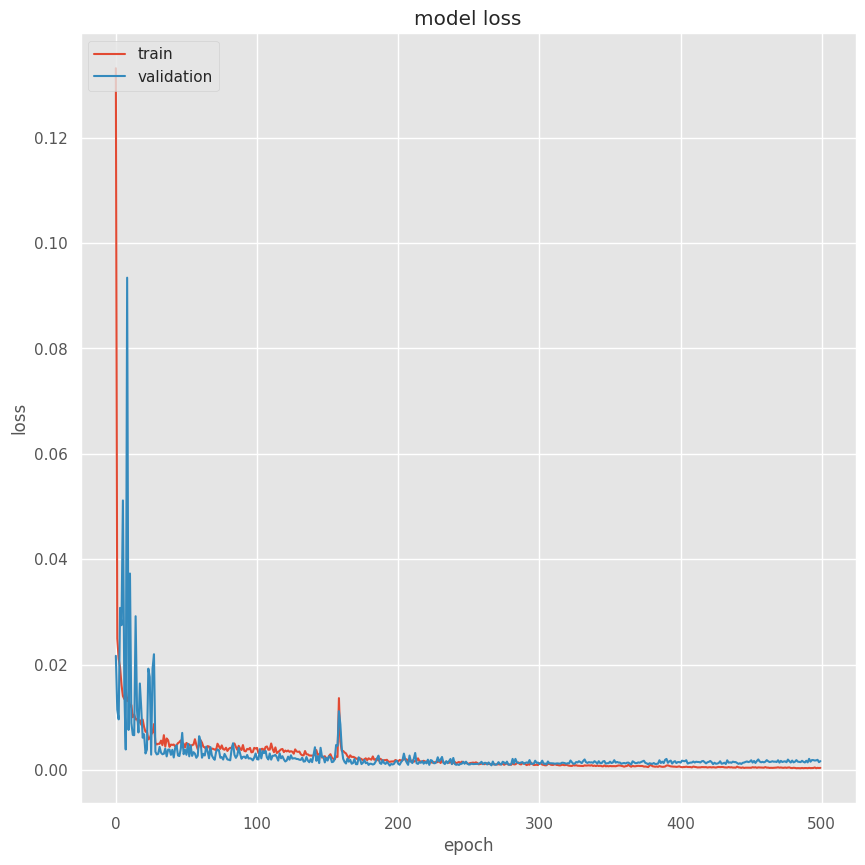

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9592.329065735084

In [ ]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)


(1297, 1)
(336, 1)
(248, 1)
[9588.005]
(1297,)


# Conclusion

In [ ]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


,Train Predictions,Actuals
0,[9588.0048828125],[9406.708333333334]
1,[9650.6962890625],[9614.791666666666]
2,[9915.5556640625],[9894.708333333334]
3,[9052.5537109375],[8933.708333333334]
4,[8631.2880859375],[8557.208333333334]
...,...,...
1292,[9290.59765625],[9259.666666666666]
1293,[10469.8056640625],[10248.5]
1294,[10598.296875],[10360.333333333334]
1295,[10501.7998046875],[10489.833333333334]


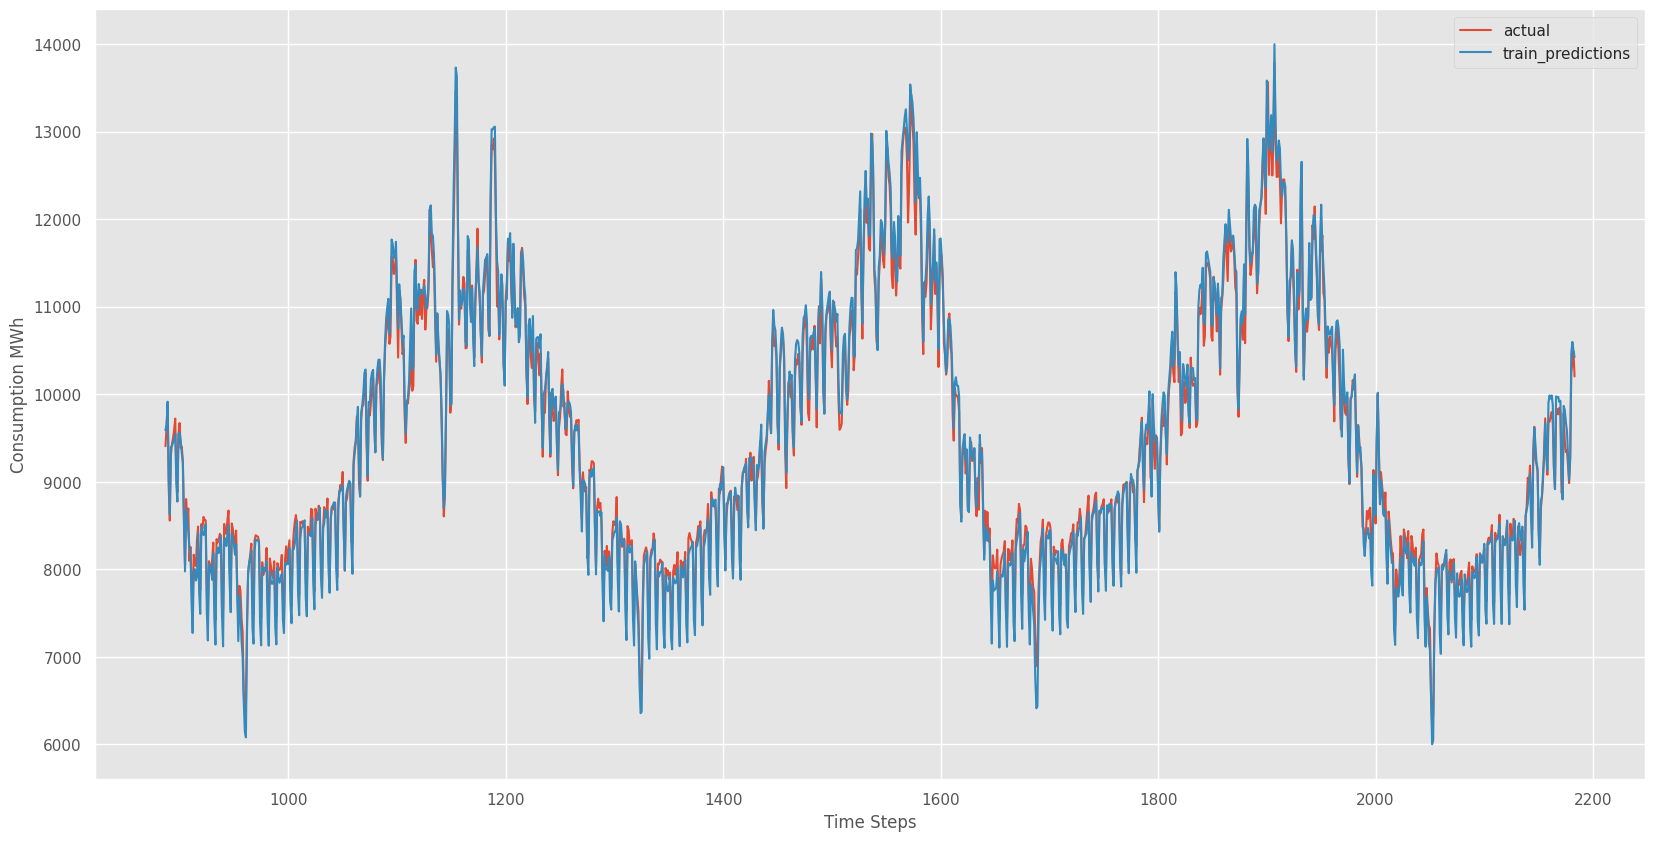

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [ ]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


,Val Predictions,Actuals_val
0,[9344.7890625],[8931.875]
1,[9341.669921875],[9112.916666666666]
2,[9306.4853515625],[10019.416666666666]
3,[9791.2373046875],[10390.375]
4,[10239.2021484375],[10802.916666666666]
...,...,...
243,[7991.03955078125],[8020.541666666667]
244,[7677.8984375],[7921.75]
245,[8704.47265625],[8705.041666666666]
246,[8825.4736328125],[8824.708333333334]


Text(0, 0.5, 'Consumption MWh')

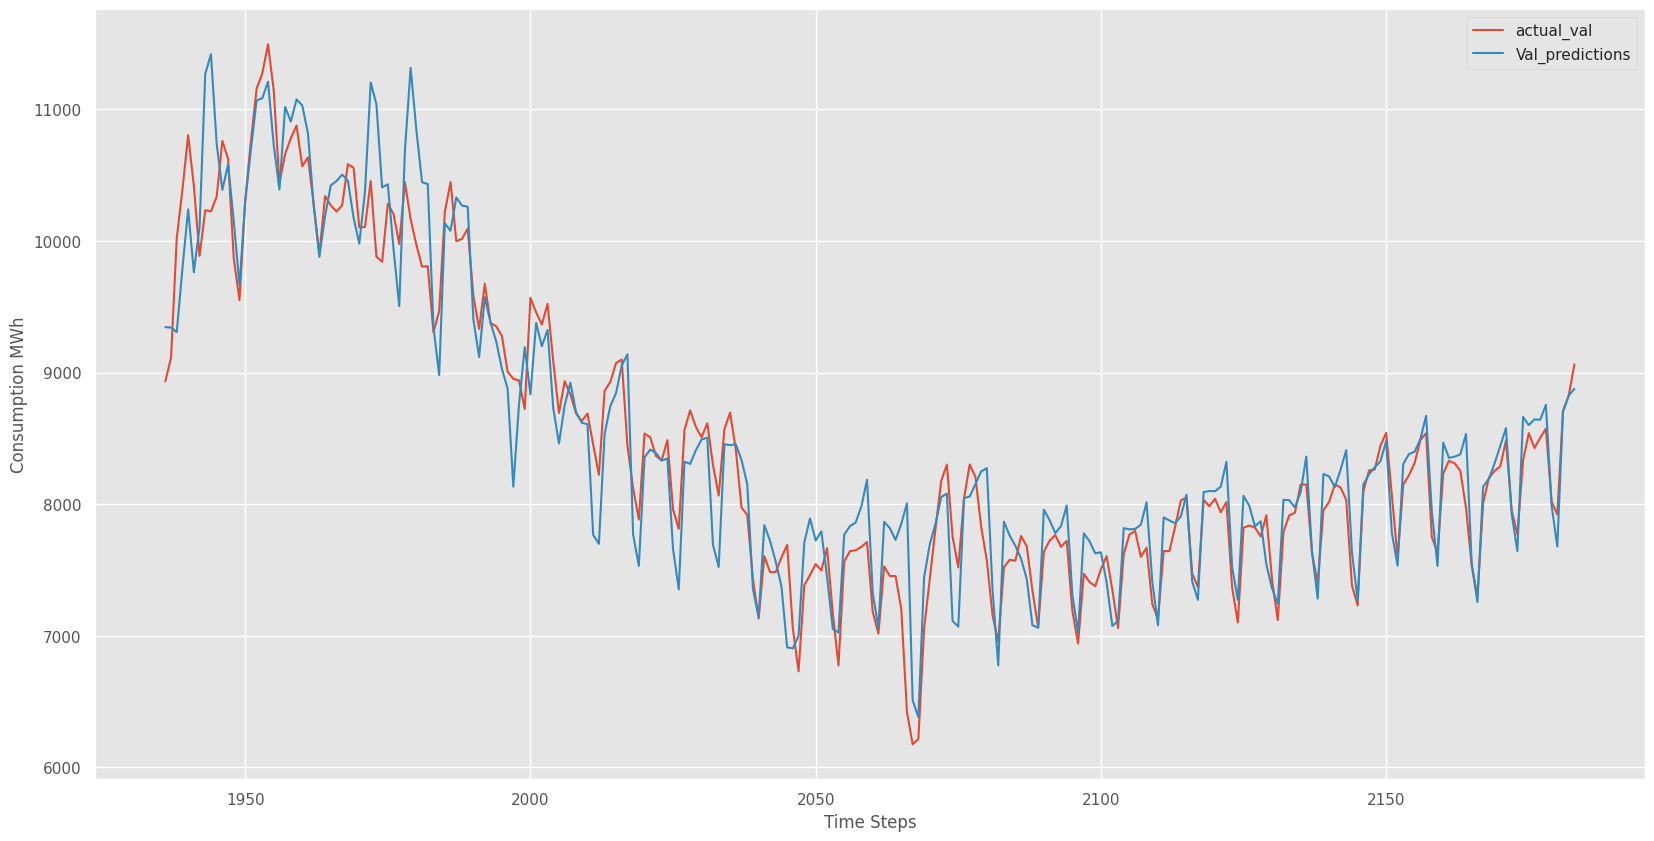

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')


In [ ]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


,test Predictions,Actuals_test
0,[10599.484375],[10032.541666666666]
1,[11037.94921875],[10732.125]
2,[11223.26171875],[10733.583333333334]
3,[11481.74609375],[10971.875]
4,[11672.7109375],[11227.791666666666]
...,...,...
331,[11576.015625],[12540.25]
332,[11580.48046875],[12635.958333333334]
333,[11795.908203125],[11684.333333333334]
334,[11671.541015625],[11384.166666666666]


Text(0, 0.5, 'Consumption MWh')

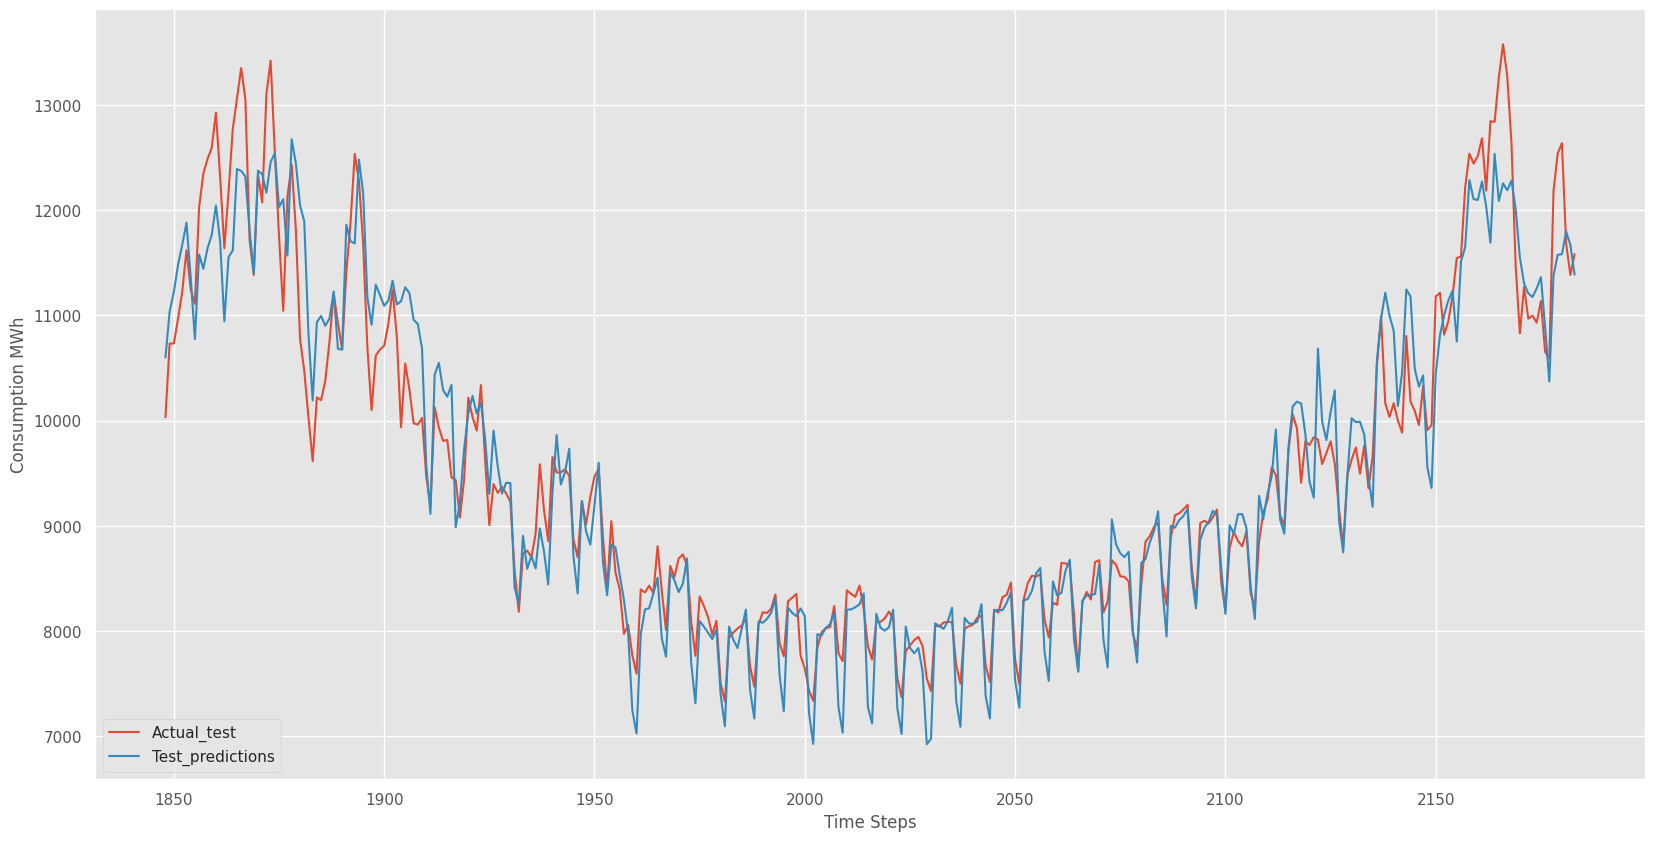

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

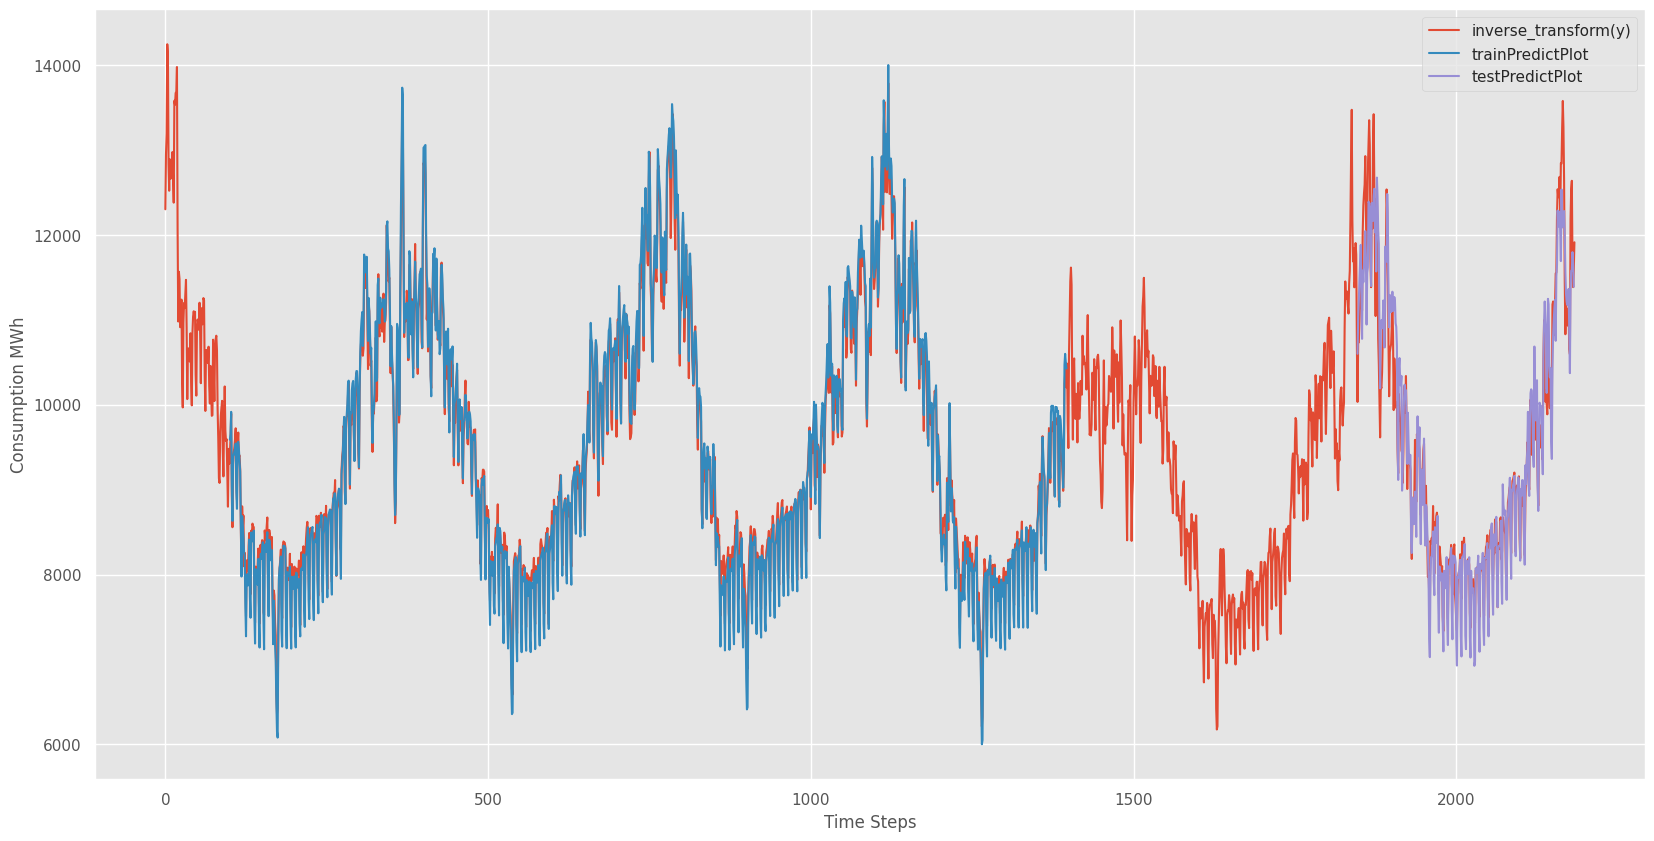

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

# Future forecasting

In [ ]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

437
[0.40285095]
1398
(1, 100)


In [ ]:

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):

    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(test)
print(len(lst_output))

1 day input [0.25709121 0.33563165 0.36255552 0.36498812 0.36948662 0.37489412
 0.30034604 0.25916744 0.35327446 0.35606342 0.3529749  0.36009193
 0.36937816 0.28358124 0.249561   0.32426919 0.3429811  0.33217643
 0.32601487 0.34354922 0.27053507 0.25411631 0.33202665 0.36575767
 0.38037909 0.41900114 0.40965809 0.36264332 0.34998967 0.43912819
 0.48126743 0.46479186 0.40083153 0.44962814 0.44524842 0.45453466
 0.45160624 0.42284888 0.4359467  0.44960748 0.42327755 0.3690941
 0.3264797  0.41017457 0.42818407 0.44249561 0.41147609 0.44483008
 0.39457184 0.43183555 0.53842578 0.59736597 0.49454602 0.47844231
 0.49448921 0.47407293 0.45992666 0.57367524 0.49652928 0.4854922
 0.46876872 0.51486933 0.46267431 0.46884619 0.620282   0.62459457
 0.57526598 0.59118893 0.62118583 0.6655046  0.66726578 0.74881727
 0.7883793  0.77671212 0.78571429 0.80647144 0.74484041 0.82660366
 0.82588059 0.87828737 0.91723995 0.87967669 0.80140998 0.65632683
 0.57681025 0.63147402 0.59401921 0.59759839 0.58928

2184
[[11438.75947277]
 [11090.77613691]
 [11221.74473758]
 [11202.22372587]
 [11225.15644262]
 [11177.09443847]
 [11387.0275415 ]
 [11845.42221198]
 [11686.47666822]
 [11588.17003424]
 [11469.38788051]
 [11457.77029152]
 [10971.90887089]
 [10396.75791184]
 [10918.30927754]
 [10877.90786157]
 [10621.38082142]
 [10487.33230943]
 [10925.75299765]
 [10360.03459762]
 [ 9851.69775854]
 [10648.22485725]
 [10773.03459699]
 [10819.52130223]
 [10841.59664477]
 [10828.32633833]
 [10084.29718162]
 [ 9672.06607814]
 [10967.78885836]
 [11570.99465991]]


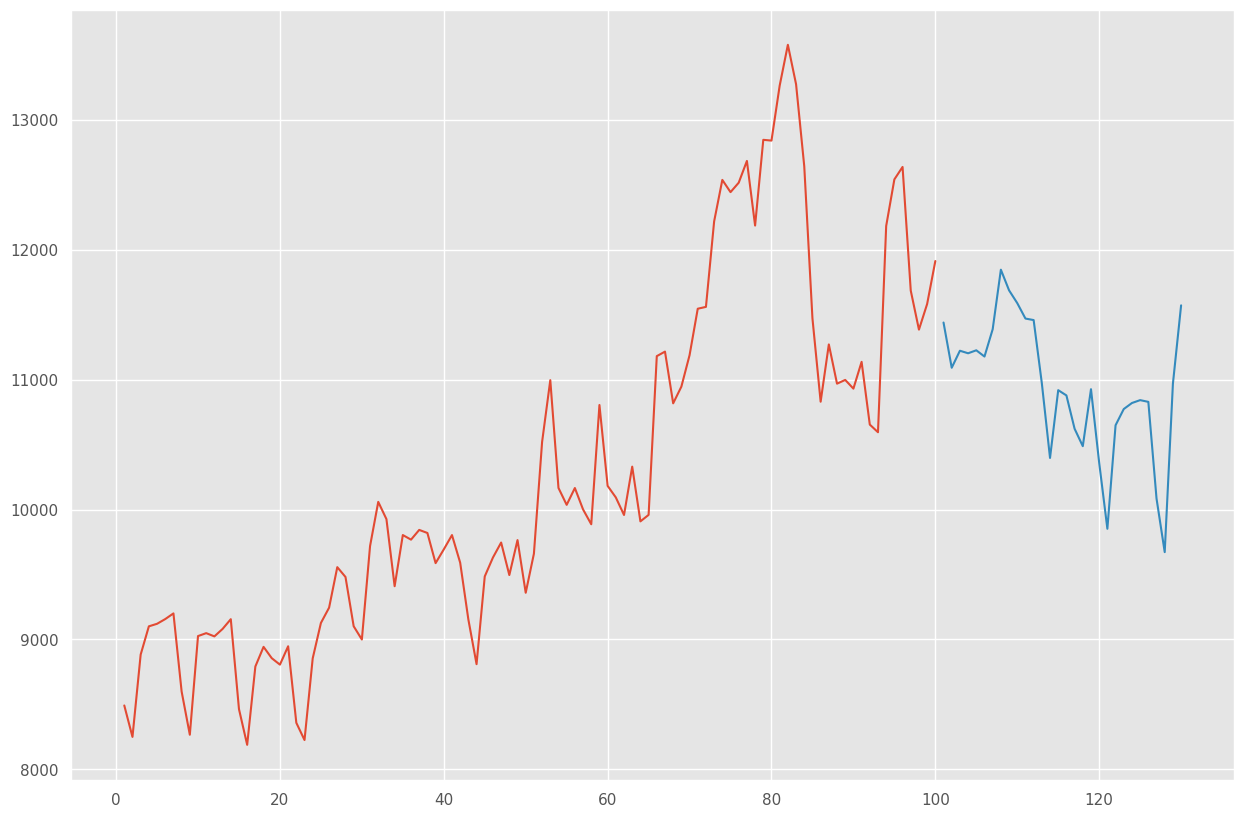

In [ ]:
print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[2084:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))

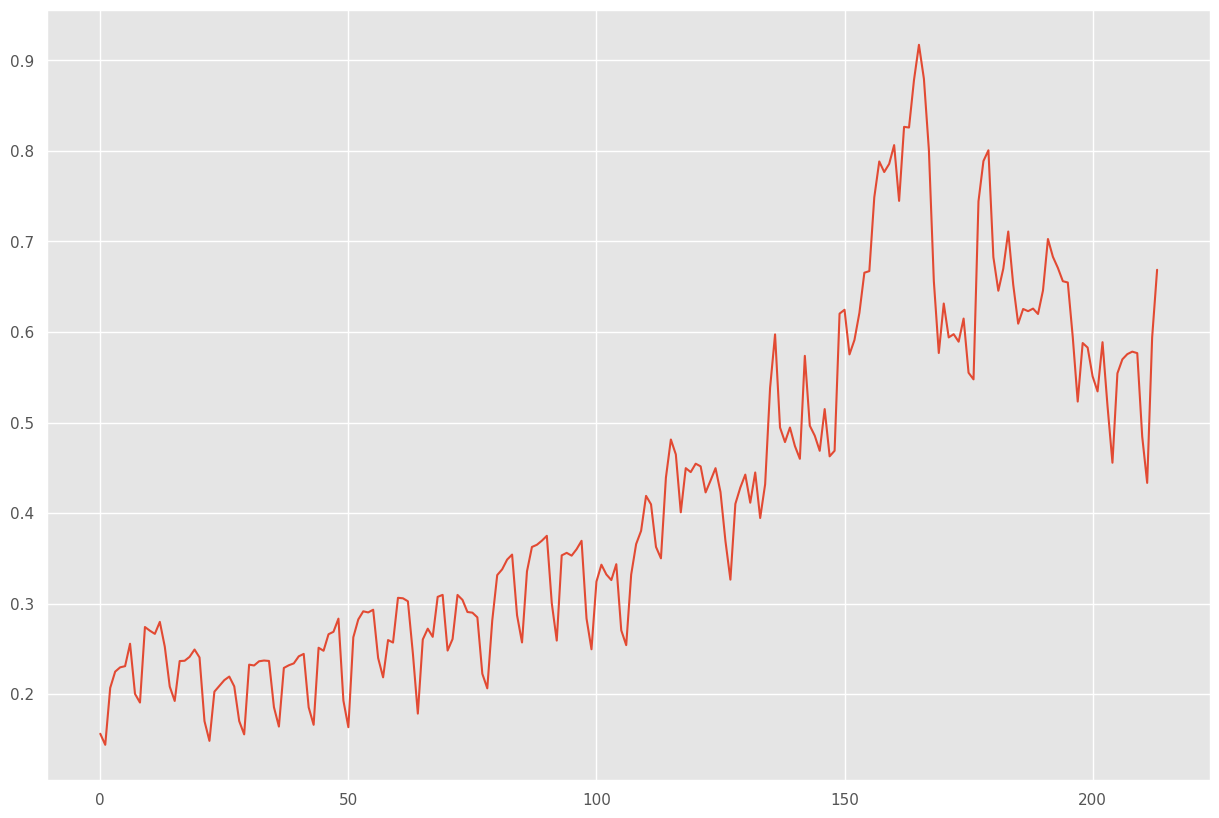

In [ ]:
df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])

